<a href="https://colab.research.google.com/github/ShaDevTech/DataScienceFundas/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

car                     99.15%
CoffeeHouse              1.71%
Restaurant20To50         1.49%
CarryAway                1.19%
RestaurantLessThan20     1.02%
Bar                      0.84%
dtype: object


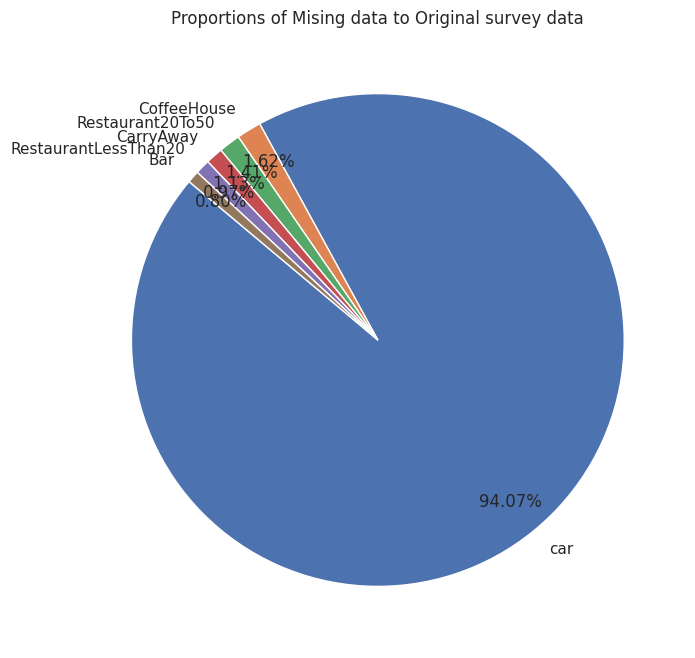

In [10]:
null_data_pct = (data.isnull().sum().sort_values(ascending=False) / len(data)*100).apply(lambda x : f'{x:.2f}%')
null_data_pct_morethan0 = null_data_pct[null_data_pct.str.rstrip('%').astype(float) > 0]
print(null_data_pct_morethan0)

# make a plot
labels = null_data_pct.index
values= null_data_pct.str.rstrip("%").astype(float).values # remove % sign to convert string to float

labels1 = null_data_pct_morethan0.index
values1= null_data_pct_morethan0.str.rstrip("%").astype(float).values

# create a pie chart using matplotlib library as seaborn does not have inbuilt pie chart
sns.set(style='dark')
plt.figure(figsize=(8,8))
sns.color_palette('pastel')
plt.pie(x=values1, labels=labels1,autopct="%0.2f%%",pctdistance=0.85, startangle=140)

plt.title("Proportions of Mising data to Original survey data")

plt.show()

In [11]:
print(data[labels1].dtypes)

car                     object
CoffeeHouse             object
Restaurant20To50        object
CarryAway               object
RestaurantLessThan20    object
Bar                     object
dtype: object


3. Decide what to do about your missing data -- drop, replace, other...

|Columns with missing data | Description |Action
|--------------------------|-------------|-------|
|car         |94.07% of data is missing| drop it |
|CoffeeHouse| 1.49% of data is missing| Repalce NaN with most occuring value i.e mode as it is Object datatype|
|Restaurant20To50| 1.19% of data is missing| Repalce NaN with most occuring value i.e mode as it is Object datatype|
|CarryAway| 1.02% of data is missing| Repalce NaN with most occuring value i.e mode as it is Object datatype|
|Bar| 0.84% of data is missing| Repalce NaN with most occuring value i.e mode as it is Object datatype|

In [12]:
# make a copy of the data
processed_data = data.copy()

# drop `car` column
processed_data.drop('car', axis=1, inplace=True)
# Repalce NaN with mode for other columns
labels1 = [label for label in labels1 if label != 'car']

# create a function to obtain mode value and then replace it
def fillNaN_UsingMode(df, labels_list):
    for label in labels_list:
        label_mode = df[label].mode().iloc[0] # mode retusns aseries even if there is 1 mode only so we need to access 1st element
        df[label] = df[label].fillna(label_mode) # fillna requires scalar (single) value not series

# apply function
fillNaN_UsingMode(processed_data,labels1)

# check for missing values
missing_values_df = pd.DataFrame({'Names': processed_data.isnull().sum().index,
                                  'Count of Missing Values': processed_data.isnull().sum().values})
print(missing_values_df)

# Final ready to use dataset without missing values is created
final_df = processed_data.copy()

                   Names  Count of Missing Values
0            destination                        0
1              passanger                        0
2                weather                        0
3            temperature                        0
4                   time                        0
5                 coupon                        0
6             expiration                        0
7                 gender                        0
8                    age                        0
9          maritalStatus                        0
10          has_children                        0
11             education                        0
12            occupation                        0
13                income                        0
14                   Bar                        0
15           CoffeeHouse                        0
16             CarryAway                        0
17  RestaurantLessThan20                        0
18      Restaurant20To50                        0


4. What proportion of the total observations chose to accept the coupon?



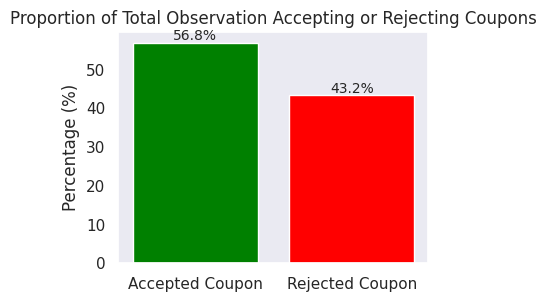

In [13]:
coupon_prop = (data['Y'].value_counts(normalize=True)*100).round(1)
labels = ['Accepted Coupon','Rejected Coupon']
plt.figure(figsize=(4,3))
barplot = plt.bar(labels,coupon_prop, color=['green','red'])
plt.title("Proportion of Total Observation Accepting or Rejecting Coupons")

for bar,val in zip(barplot,coupon_prop.values):
    plt.text(bar.get_x() + bar.get_width() /2,val, s=f'{val:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.ylabel("Percentage (%)")
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [14]:
coupon_prop = (data['Y'].value_counts(normalize=True)*100).round(1)
labels = ['Accepted Coupon','Rejected Coupon']

# Use fig() to have fine grained control on plot
fig = go.Figure(data=[
    go.Bar(x=labels, y=coupon_prop, marker_color=['green','red'])])

# add labels to plot
for marker, val in zip(labels,coupon_prop):
    fig.add_annotation(
        text=f'{val:0.2f}%',
        x = marker,
        y= val,
        xanchor='center',
        yanchor='bottom'
    )

# customize the layout
fig.update_layout(
    title="Proportion of Total Observation Accepting or Rejecting Coupons",
    width= 400,
    height=400,
    barmode='relative',
    yaxis_title = "Percentages (%)",
    xaxis=dict(categoryorder='total descending'),  # Sort bars by value
)

# show the plot
fig.show()

6. Use a histogram to visualize the temperature column.

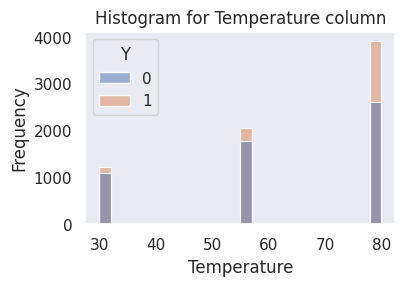

In [15]:
plt.figure(figsize=(4,2.5))
sns.histplot(data=final_df,x='temperature',hue='Y',bins='auto')
plt.title("Histogram for Temperature column")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

Understand correlation between target and independent variables

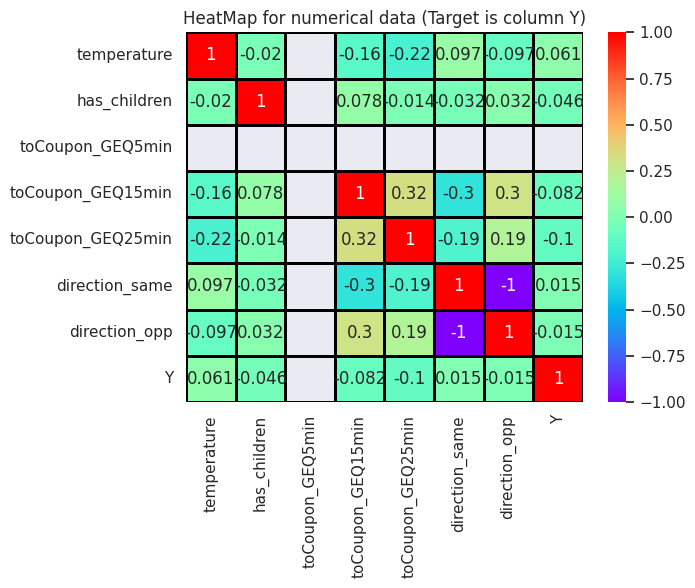

In [16]:
sns.heatmap(final_df.select_dtypes(include=['int','float']).corr(),
            cmap = 'rainbow',
            linecolor='black',
            linewidths=2,
            annot=True)
plt.title("HeatMap for numerical data (Target is column Y)")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
bar_df = final_df.loc[:,['Bar','Y']]
print(bar_df.head())

     Bar  Y
0  never  1
1  never  0
2  never  1
3  never  0
4  never  0


2. What proportion of bar coupons were accepted?


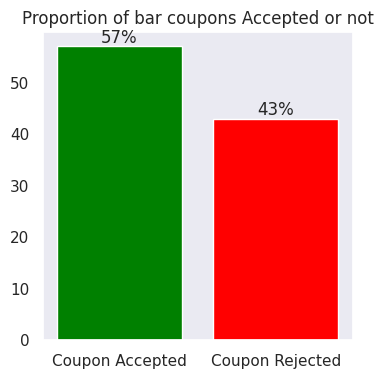

In [18]:
prop = bar_df['Y'].value_counts(normalize=True).round(2)*100
labels = ['Coupon Accepted',"Coupon Rejected"]
plt.figure(figsize=(4,4))
plt.bar(labels,prop, color=['green','red'])
plt.title("Proportion of bar coupons Accepted or not")
for bar, val in zip(labels, prop):
    plt.text(bar,val, s=f'{val:0.0f}%', ha='center', va='bottom')

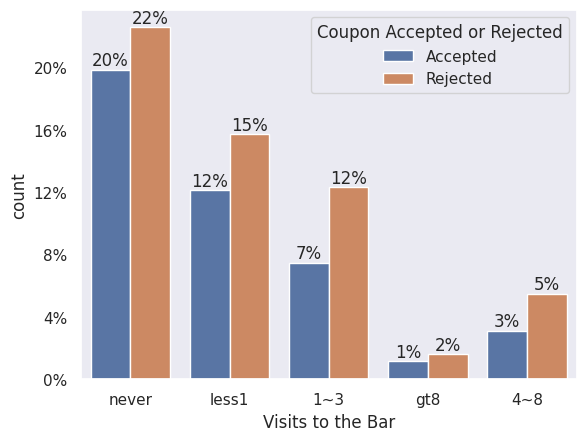

In [19]:
from matplotlib.ticker import FuncFormatter
# Create a bar plot
ax = sns.countplot(data=bar_df, x='Bar', hue='Y')

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{(height/len(bar_df))*100:.0f}%', xy = (bar.get_x()+bar.get_width()/2,height),
                xycoords='data', ha='center', va='bottom')

ax.legend(title="Coupon Accepted or Rejected", labels=["Accepted","Rejected"])
ax.set_xlabel("Visits to the Bar")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _ : f'{y/len(bar_df)*100:.0f}%'))
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<ipython-input-135-a511ee836156>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



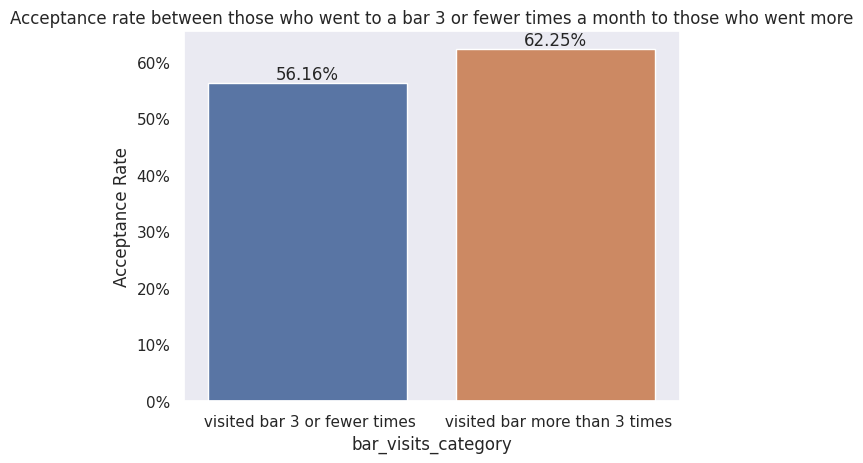

In [135]:
# create a column to store visits to bar '3 times or less' and 'more than 3
visits3_or_less= ['never','less1','1~3']
processed_data['bar_visits_category'] = processed_data['Bar'].apply(lambda x : " visited bar 3 or fewer times"if x in visits3_or_less else " visited bar more than 3 times" )


# Create a bar plot using Seaborn
ax = sns.barplot(data=processed_data, x='bar_visits_category', y='Y', errorbar=None)

# Show labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# change y axis to %
ax.set(yticklabels=[f'{x*100:.0f}%' for x in ax.get_yticks()])
ax.set_ylabel("Acceptance Rate")
ax.set_title("Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more")


plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<ipython-input-134-7aa4e5622ef3>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



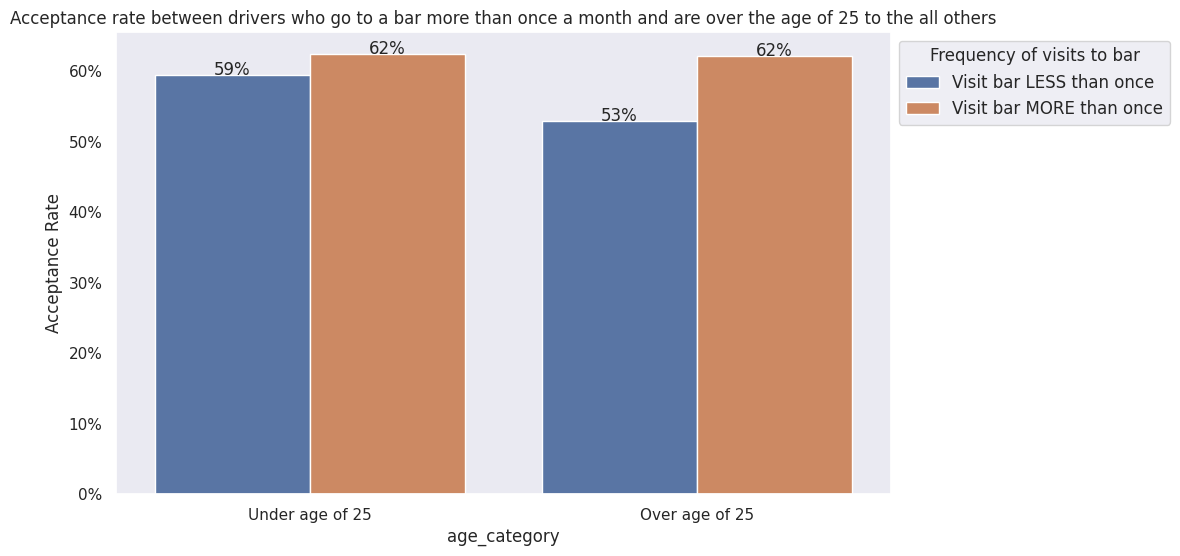

In [134]:
processed_data['age_category'] = processed_data['age'].apply(lambda x :"Over age of 25" if x in ['46', '26', '31', '41', '50plus', '36'] else 'Under age of 25')
processed_data['Bar_visits>1'] = processed_data['Bar'].apply(lambda x : "Visit bar MORE than once" if x in ['1~3', 'gt8', '4~8'] else "Visit bar LESS than once" )

plt.figure(figsize=(10,6))
ax= sns.barplot(data = processed_data,x='age_category',y='Y',hue='Bar_visits>1', errorbar=None)
plt.title("Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others")
plt.legend(title="Frequency of visits to bar", fontsize=12, loc='upper left', bbox_to_anchor=(1,1))

ax.set(yticklabels=[f'{y*100:.0f}%' for y in ax.get_yticks()])

for p in ax.patches:
  ax.annotate(f'{p.get_height()*100:.0f}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center')

ax.set_ylabel("Acceptance Rate")

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


<ipython-input-272-da40d5093657>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



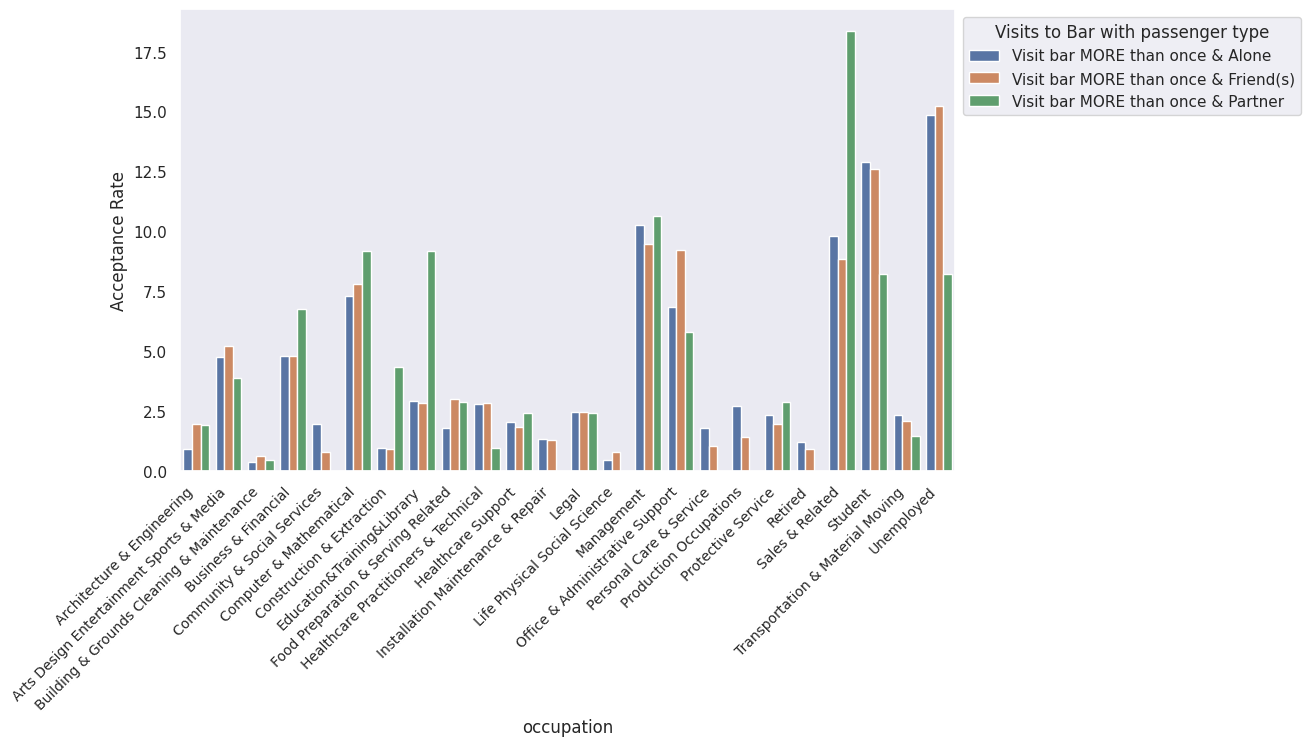

In [272]:
from matplotlib.ticker import FuncFormatter

# Create conditions based on your criteria
occupation_condition = ~processed_data['occupation'].isin(['farming', 'fishing', 'forestry'])
passanger_condition = processed_data['passanger'] != 'Kid(s)'
barvisits_condition = processed_data['Bar_visits>1'] != 'Visit bar LESS than once'

# Apply the conditions to filter the data
filtered_data = processed_data[occupation_condition & passanger_condition & barvisits_condition]

# Create a new column for the combination of 'Bar_visits>1' and 'passanger'
filtered_data['Bar_and_Passanger'] = filtered_data['Bar_visits>1'] + ' & ' + filtered_data['passanger']

# Calculate the total 'Y' for each 'Bar_and_Passanger' group
total_acceptance['Total_Y'] = total_acceptance.groupby('Bar_and_Passanger')['Y'].transform('sum')


# Divide 'Y' by the total 'Y' for each group to get the relative percentage
total_acceptance['Acceptance Rate'] = (total_acceptance['Y'] / total_acceptance['Total_Y']) * 100


# Print the updated DataFrame
plt.figure(figsize=(10,6))
ax = sns.barplot(data= total_acceptance, hue= 'Bar_and_Passanger', y='Acceptance Rate', x='occupation', hue_order= ['Visit bar MORE than once & Alone','Visit bar MORE than once & Friend(s)','Visit bar MORE than once & Partner'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax.legend(title ='Visits to Bar with passenger type' ,bbox_to_anchor=(1,1), loc='upper left')

plt.show()

6. Compare the acceptance rates between those drivers who:

> Indented block



- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



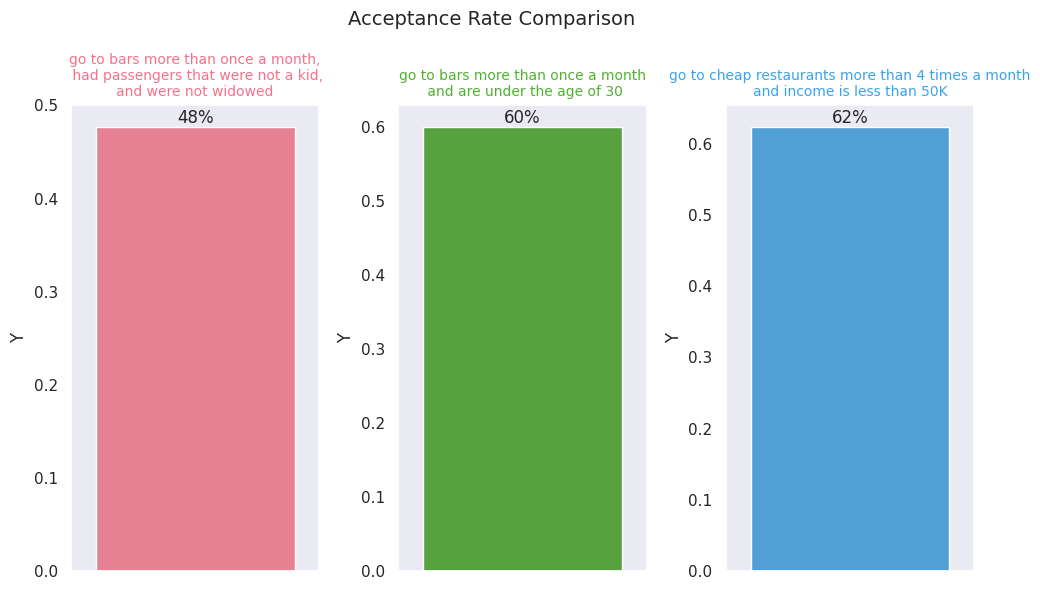

In [377]:
df1 = processed_data.query('("Bar_visits>1" != "Visit bar LESS than once") & (passanger != "Kid(s)") & (maritalStatus == "Widowed")')
df2 = processed_data.query('("Bar_visits>1" != "Visit bar LESS than once") & age in ["21","26","below21"]')
df3 = processed_data.query('(Bar in ["4~8"]) & income in ["$25000 - $37499","$12500 - $24999","$37500 - $49999"]')

queries = [
    (df1, 'go to bars more than once a month,\n had passengers that were not a kid,\nand were not widowed'),
    (df2, 'go to bars more than once a month\n and are under the age of 30'),
    (df3, 'go to cheap restaurants more than 4 times a month\nand income is less than 50K'),
]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

#define a color palette for each subplot
palette = sns.color_palette("husl", len(queries))

# Iterate through the queries and titles
for i, (data, title) in enumerate(queries):
    sns.barplot(data=data, y='Y', ax=axes[i], palette=[palette[i]],errorbar=None)
    axes[i].set_title(title, fontsize=10, color = palette[i])

    # Add data values to the subplots
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()*100:.0f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Add a single title for the entire chart
fig.suptitle('Acceptance Rate Comparison', fontsize=14)

plt.tight_layout()
plt.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypotheis is that People who are  under age of 25 , visits bar more than 3 times in a month, are unemployed and has a friend or employed who has a partner travelling with them and they work in occupation in Sales related and management are most likely to accept coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

See above, I explored different things above itself